In [17]:
import pymssql
import pandas as pd
import numpy as np
import re
import datetime
import os
import openpyxl
import requests
from bs4 import BeautifulSoup
import xlrd

from sklearn.preprocessing import LabelEncoder

## INPUT your EbisOS User ID and password, as {ID}:{Password}@

In [18]:
user_password = 'CYKhaw:M00105@'


## INPUT your SQL data base User ID and password

In [19]:
Username_SQL = 'KhawChanYong'
Password_SQL = 'M00105'

# Extract AOI inspected Result 

In [20]:
#path = ('C:\\Users\\QiauHui_Wong\\QIAO HUI\\Latest Result\\')
path = 'C:\\Users\\ChanYong_Khaw\Desktop\\PROJECT\\QIAO HUI\\Latest Result\\'

In [21]:
files = os.listdir (path)
files

['HRH14720035_20211118171226',
 'HRH14720040_20211118170937',
 'HRH14720051_20211118164613',
 'HRH14720064_20211118171130',
 'HRH14720255_20211118171418',
 'HRH14720259_20211118164805',
 'HRH14720261_20211118164709',
 'HRH14720262_20211118164134',
 'HRH14720364_20211118171610',
 'HRH14720365_20211118164421',
 'HRH14720379_20211118164038',
 'HRH14720421_20211118163929',
 'HRH14720423_20211118171322',
 'HRH14720512_20211118164230',
 'HRH14720541_20211118164517',
 'HRH14721034_20211118171033',
 'HRH14721037_20211118164325',
 'HRH14721038_20211118170808',
 'HRH14721041_20211118171514']

In [22]:
fail_path_list = []
pass_path_list = []

for file in files:
    result = path + file
    #print (result)
    
    fail_path = result + '\\Fail\\'
    pass_path = result + '\\Pass\\'
    #print (fail_path)

    fail_path_list.append (fail_path)
    pass_path_list.append (pass_path)

final_path_list = fail_path_list + pass_path_list

#print('fail_path_list' , fail_path_list)
#print('pass_path_list',pass_path_list)
#print('final_path_list', final_path_list)

#fail_path_list

die_grab_1 = []
die_grab_2 = []
die_grab_3 = []
pcb_grab_1 = []
pcb_grab_2 = []

for i in final_path_list:                 # There's 3 fail and 3 pass in the joinedlist
    final_path = os.listdir (i)        # Make the All fail & pass data into a list = 30 
    #print (final_path)       
    
    for j in range(len(final_path)):      # Loop N times depending on the total number of the data in all_data
        full_path = i + final_path[j]  # save in new list
        
        if 'Die level_Grab 1' in full_path:
            die_grab_1.append (full_path)
            
        elif 'Die level_Grab 2' in full_path:
            die_grab_2.append (full_path)
            
        elif 'Die level_Grab 3' in full_path:
            die_grab_3.append (full_path)
            
        elif 'PCB level_Grab 1' in full_path:
            pcb_grab_1.append (full_path)
            
        elif 'PCB level_Grab 2' in full_path:
            pcb_grab_2.append (full_path)

#print ( 'die_grab_1 === ' ,die_grab_1 ,"\n" , len(die_grab_1),"\n")
#print ( 'die_grab_2 === ' ,die_grab_2 ,"\n", len(die_grab_2),"\n")
#print ( 'die_grab_3 === ' ,die_grab_3,"\n", len(die_grab_3),"\n")
#print ( 'pcb_grab_1 === ' ,pcb_grab_1,"\n", len(pcb_grab_1),"\n")
#print ( 'pcb_grab_2 === ' ,pcb_grab_2,"\n", len(pcb_grab_2),"\n")

#pcb_grab_2

In [23]:
df_die_grab_1 = pd.DataFrame ()
df_die_grab_2 = pd.DataFrame ()
df_die_grab_3 = pd.DataFrame ()
df_pcb_grab_1 = pd.DataFrame ()
df_pcb_grab_2 = pd.DataFrame ()

for k in die_grab_1:
    
    df_1 = pd.read_csv (k, sep = ';', header = [0,1])
    df_1.columns = df_1.columns.to_flat_index().str.join(' ')
    df_die_grab_1 = df_die_grab_1.append(df_1)

for k in die_grab_2:
    
    df_2 = pd.read_csv (k, sep = ';', header = [0,1])
    df_2.columns = df_2.columns.to_flat_index().str.join(' ')
    df_die_grab_2 = df_die_grab_2.append(df_2)
    #print (df2)

for k in die_grab_3:
    
    df_3 = pd.read_csv (k, sep = ';', header = [0,1])
    df_3.columns = df_3.columns.to_flat_index().str.join(' ')
    df_die_grab_3 = df_die_grab_3.append(df_3)
    #print (df_die_grab_3)
    
for k in pcb_grab_1:
    
    df_4 = pd.read_csv (k, sep = ';', header = [0,1])
    df_4.columns = df_4.columns.to_flat_index().str.join(' ')
    df_pcb_grab_1 = df_pcb_grab_1.append(df_4)
    #print (df4)
    
for k in pcb_grab_2:

    df_5 = pd.read_csv (k, sep = ';', header = [0,1])
    df_5.columns = df_5.columns.to_flat_index().str.join(' ')
    df_pcb_grab_2 = df_pcb_grab_2.append(df_5)   ### df_pcb_grab_2 = [978] + 980
    #print (ddf_pcb_grab_2f5)
    
#df_die_grab_1
#pd.set_option('max_columns', None)
#df_die_grab_1.head ()

In [24]:
#Rename Column Die grab 1
df_die_grab_1.rename(columns={'Unnamed: 0_level_0 Lot ID':'DPNO'},inplace=True)
df_die_grab_1.rename(columns={'Unnamed: 1_level_0 Unit':'Unit'},inplace=True)


#Add New Columns
df_die_grab_1['Col']=df_die_grab_1['Unit'].str.extract('_(\d+)')
df_die_grab_1['Row']=df_die_grab_1['Unit'].str.extract('\d_(\d+)')
df_die_grab_1['C_R']=df_die_grab_1['Col'] + '_' + df_die_grab_1['Row']
#pd.set_option('max_columns', 8)

#Rearrange Row and Col
cols = list (df_die_grab_1.columns.values)
df_die_grab_1 = df_die_grab_1[cols [0:2] + [cols [-1]]+ [cols [-3]]+[cols [-2]]+ cols [2:-3]]




df_die_grab_1.to_excel ('sample1.xlsx', index = False)
pd.set_option('max_columns', None)
#pd.set_option ('display.max_rows', None)
#df_die_grab_1.head(3)

In [25]:
#df_die_grab_1.isnull().sum()
#pd.set_option ('display.max_rows', None)

In [26]:
#Rename Column Die grab 2
df_die_grab_2.rename(columns={'Unnamed: 0_level_0 Lot ID':'DPNO'},inplace=True)
df_die_grab_2.rename(columns={'Unnamed: 1_level_0 Unit':'Unit'},inplace=True)


#Add New Columns
df_die_grab_2['Col']=df_die_grab_2['Unit'].str.extract('_(\d+)')
df_die_grab_2['Row']=df_die_grab_2['Unit'].str.extract('\d_(\d+)')
df_die_grab_2['C_R']=df_die_grab_2['Col'] + '_' + df_die_grab_2['Row']
#pd.set_option('max_columns', 8)

#Rearrange Row and Col
cols = list (df_die_grab_2.columns.values)
df_die_grab_2 = df_die_grab_2[cols [0:2] + [cols [-1]]+ [cols [-3]]+[cols [-2]]+ cols [2:-3]]



df_die_grab_2.to_excel ('sample2.xlsx', index = False)
pd.set_option('max_columns', None)
#df_die_grab_2.head()

In [27]:
#Rename Column Die grab 3
df_die_grab_3.rename(columns={'Unnamed: 0_level_0 Lot ID':'DPNO'},inplace=True)
df_die_grab_3.rename(columns={'Unnamed: 1_level_0 Unit':'Unit'},inplace=True)


#Add New Columns
df_die_grab_3['Col']=df_die_grab_3['Unit'].str.extract('_(\d+)')
df_die_grab_3['Row']=df_die_grab_3['Unit'].str.extract('\d_(\d+)')
df_die_grab_3['C_R']=df_die_grab_3['Col'] + '_' + df_die_grab_3['Row']
pd.set_option('max_columns', 8)

#Rearrange Row and Col
cols = list (df_die_grab_3.columns.values)
df_die_grab_3 = df_die_grab_3[cols [0:2] + [cols [-1]]+ [cols [-3]]+[cols [-2]]+ cols [2:-3]]



df_die_grab_3.to_excel ('sample3.xlsx', index = False)
pd.set_option('max_columns', None)
#df_die_grab_3.head()

In [28]:
#Rename Column PCB grab 1
df_pcb_grab_1.rename(columns={'Unnamed: 0_level_0 Lot ID':'DPNO'},inplace=True)
df_pcb_grab_1.rename(columns={'Unnamed: 1_level_0 Unit':'Unit'},inplace=True)


#Add New Columns
df_pcb_grab_1['Col']=df_pcb_grab_1['Unit'].str.extract('_(\d+)')
df_pcb_grab_1['Row']=df_pcb_grab_1['Unit'].str.extract('\d_(\d+)')
df_pcb_grab_1['C_R']=df_pcb_grab_1['Col'] + '_' + df_pcb_grab_1['Row']
#pd.set_option('max_columns', 8)

#Rearrange Row and Col
cols = list (df_pcb_grab_1.columns.values)
df_pcb_grab_1 = df_pcb_grab_1[cols [0:2] + [cols [-1]]+ [cols [-3]]+[cols [-2]]+ cols [2:-3]]



df_pcb_grab_1.to_excel ('sample4.xlsx', index = False)
pd.set_option('max_columns', None)
#df_pcb_grab_1.head()

In [29]:
#Rename Column PCB grab 2
df_pcb_grab_2.rename(columns={'Unnamed: 0_level_0 Lot ID':'DPNO'},inplace=True)
df_pcb_grab_2.rename(columns={'Unnamed: 1_level_0 Unit':'Unit'},inplace=True)


#Add New Columns
df_pcb_grab_2['Col']=df_pcb_grab_2['Unit'].str.extract('_(\d+)')
df_pcb_grab_2['Row']=df_pcb_grab_2['Unit'].str.extract('\d_(\d+)')
df_pcb_grab_2['C_R']=df_pcb_grab_2['Col'] + '_' + df_pcb_grab_2['Row']
#pd.set_option('max_columns', 8)

#Rearrange Row and Col
cols = list (df_pcb_grab_2.columns.values)
df_pcb_grab_2 = df_pcb_grab_2[cols [0:2] + [cols [-1]]+ [cols [-3]]+[cols [-2]]+ cols [2:-3]]



df_pcb_grab_2.to_excel ('sample5.xlsx', index = False)
pd.set_option('max_columns', None)
#df_pcb_grab_2.head()

In [30]:
## Add merged all 5 grabs data frame
Merged_1 = pd.merge(df_die_grab_1, df_die_grab_2, on=['DPNO', 'C_R'])
Merged_2 = pd.merge(Merged_1, df_die_grab_3, on=['DPNO', 'C_R'])
Merged_3 = pd.merge(Merged_2, df_pcb_grab_1, on=['DPNO', 'C_R'])
Merged_4 = pd.merge(Merged_3, df_pcb_grab_2, on=['DPNO', 'C_R'])
Merged_4.drop (['Col_y', 'Row_y'],axis = 1, inplace=True)

# After complete AOI result data extract, lets download map and DA tracker

### Download DA Tracker append to a list

In [31]:
## Get map & DA Tracker

# Extracted PCBID
PCBIDs = Merged_4.DPNO.unique()
print(PCBIDs)


['HRH14720035' 'HRH14720040' 'HRH14720051' 'HRH14720064' 'HRH14720255'
 'HRH14720259' 'HRH14720261' 'HRH14720262' 'HRH14720364' 'HRH14720365'
 'HRH14720379' 'HRH14720421' 'HRH14720423' 'HRH14720512' 'HRH14720541'
 'HRH14721034' 'HRH14721037' 'HRH14721038' 'HRH14721041']


In [32]:
# Download DA Tracker

df_DA_trackers = pd.DataFrame()
PCBID = 'HRH14720261'
for PCBID in PCBIDs:
    #http://192.168.200.116/H%3A/XASICBAK/HRH13761057.csv
    for month in ['January','February','March','April','May','June','July','August','September','October','November','December']:
        response = requests.get('http://'+user_password+'192.168.200.116/R%3A/DAFiles/XASICBAK/2021/'+month+'/'+PCBID+'.csv') #Call request fucntion to get into web page
        if response.status_code == 200:
            file = open(PCBID+'.csv', "wb") #open with assign filename
            file.write(response.content) #Save content
            file.close()

    ##Read DA Tracker
    df_DA_tracker = pd.read_csv(PCBID+'.csv', skiprows=3, error_bad_lines=False, warn_bad_lines=False)  
    if df_DA_tracker.isnull().values.any() == True:
        df_DA_tracker.dropna(inplace= True)
        df_DA_tracker.drop(2,axis=0, inplace = True)
    df_DA_tracker['Wafer Row'] = df_DA_tracker['Wafer Row'].fillna(0.0).astype(int)
    df_DA_tracker['Wafer Col'] = df_DA_tracker['Wafer Col'].fillna(0.0).astype(int)
    df_DA_tracker['PCBA Row'] = df_DA_tracker['PCBA Row'].fillna(0.0).astype(int)
    df_DA_tracker['PCBA Col'] = df_DA_tracker['PCBA Col'].fillna(0.0).astype(int)
    
    df_DA_tracker['Wafer_CR'] = '_'+df_DA_tracker['Wafer Col'].astype(str)+'_'+df_DA_tracker['Wafer Row'].astype(str)+'_'
    df_DA_tracker['PCBA_CR'] = df_DA_tracker['PCBA Col'].astype(str)+'_'+df_DA_tracker['PCBA Row'].astype(str)  # Becareful!!!!! edited from _C_R_ to C_R
    df_DA_tracker['PCBID']=PCBID
    df_DA_trackers=df_DA_trackers.append(df_DA_tracker)

indexname = df_DA_trackers[df_DA_trackers['Time']=='1'].index
df_DA_trackers.drop(indexname,inplace=True)
indexname = df_DA_trackers[(df_DA_trackers['Time']=='2')].index
df_DA_trackers.drop(indexname,inplace=True)
indexname = df_DA_trackers[(df_DA_trackers['Time']=='0')].index
df_DA_trackers.drop(indexname,inplace=True)
df_DA_trackers.drop(df_DA_trackers.iloc[:,10:],axis= 1, inplace = True)
df_DA_trackers.dropna(axis = 0 ,inplace = True)


df_DA_trackers

,Time,PCBA Col,PCBA Row,Wafer Col,Wafer Row,Bin,Wafmap Filename,Wafer_CR,PCBA_CR,PCBID
0,11/18/21 11:16:51,1,1,31,13,1,J122PRA_024,_31_13_,1_1,HRH14720035
1,11/18/21 11:16:53,2,1,31,12,1,J122PRA_024,_31_12_,2_1,HRH14720035
2,11/18/21 11:16:55,3,1,31,11,1,J122PRA_024,_31_11_,3_1,HRH14720035
3,11/18/21 11:16:57,4,1,31,10,1,J122PRA_024,_31_10_,4_1,HRH14720035
4,11/18/21 11:16:59,5,1,31,9,1,J122PRA_024,_31_9_,5_1,HRH14720035
...,...,...,...,...,...,...,...,...,...,...
279,11/18/21 11:59:43,5,16,17,21,1,J122PRA_024,_17_21_,5_16,HRH14721041
280,11/18/21 11:59:45,4,16,17,20,1,J122PRA_024,_17_20_,4_16,HRH14721041
281,11/18/21 11:59:47,3,16,17,19,1,J122PRA_024,_17_19_,3_16,HRH14721041
282,11/18/21 11:59:49,2,16,17,18,1,J122PRA_024,_17_18_,2_16,HRH14721041


### Download AOI map and append to a list

In [33]:
##Search Map from different server and download "offline" lateset map
df_map_append = pd.DataFrame()

for PCBID in PCBIDs:
    
    url_map = 'http://'+user_password+'192.168.200.116/P%3A/XHOutput/'+PCBID+'/' # Create dynamic URL
    r = requests.get(url_map) #Call request fucntion to get into web page
    soup = BeautifulSoup(r.content,'html.parser') #call scraping HTML function 

    mapfile =[]

    for a in soup.find_all('a', href=True): #Find all avilable image and loop each of them
        x = re.search('O'+PCBID+'.xls',a['href']) #search only if match string content .jpg ##TTV machine might different
        if x:
            mapfile.append(a['href']) #add into images_list if fulfill 'HE'

    if mapfile == []:
        for month in ['January','February','March','April','May','June','July','August','September','October','November','December']:
            url_map= 'http://'+user_password+'192.168.200.116/R%3A/MapArchive/XHOutputBAK/2021/'+month+'/'+ PCBID+'/'
            r = requests.get(url_map) #Call request fucntion to get into web page
            if r.status_code == 200:
                
                soup = BeautifulSoup(r.content,'html.parser') #call scraping HTML function 
                mapfile =[]

                for a in soup.find_all('a', href=True): #Find all avilable image and loop each of them
                    x = re.search('O'+PCBID+'.xls',a['href']) #search only if match string content .jpg ##TTV machine might different
                    if x:
                        mapfile.append(a['href']) #add into images_list if fulfill 'HE'
                break
            else: 
                mapfile = []
    
    if mapfile == []:
        url_map= 'http://'+user_password+'192.168.200.116/H%3A/XHOUTPUTBAK/'+ PCBID+'/'
    
        r = requests.get(url_map) #Call request fucntion to get into web page
        soup = BeautifulSoup(r.content,'html.parser') #call scraping HTML function 
        mapfile =[]

        for a in soup.find_all('a', href=True): #Find all avilable image and loop each of them
            x = re.search('O'+PCBID+'.xls',a['href']) #search only if match string content .jpg ##TTV machine might different
            if x:
                mapfile.append(a['href']) #add into images_list if fulfill 'HE'
    response = requests.get(url_map + 'O' +PCBID+'.xls') #Call request fucntion to get into web page
    file = open(mapfile[0][1:], "wb") #open with assign filename
    file.write(response.content) #Save image content
    file.close()

    ##Access .xls and look for top defect coordinate, String format "_C_R_"
    book = xlrd.open_workbook(PCBID + ".xls")
    worksheet = book.sheet_by_name('Sheet1')
    Map_lists = []
    cor_bin = []
    for row in range(1, 17):
        for col in range(1, 19):
            cor_bin = [row,col, int(worksheet.cell(row+3, col).value)]
            Map_lists.append(cor_bin)
    df_map = pd.DataFrame(Map_lists,columns=['Row', 'Column', 'Bin@Map'])
    df_map['PCBID'] = PCBID
    df_map['C_R'] = df_map['Column'].astype(str) +'_'+ df_map['Row'].astype(str)
    df_map_append=df_map_append.append(df_map)
df_map_append


,Row,Column,Bin@Map,PCBID,C_R
0,1,1,1,HRH14720035,1_1
1,1,2,1,HRH14720035,2_1
2,1,3,1,HRH14720035,3_1
3,1,4,1,HRH14720035,4_1
4,1,5,1,HRH14720035,5_1
...,...,...,...,...,...
283,16,14,1,HRH14721041,14_16
284,16,15,1,HRH14721041,15_16
285,16,16,1,HRH14721041,16_16
286,16,17,1,HRH14721041,17_16


### Download production output file

In [34]:
# load production transection

conn = pymssql.connect(server='192.168.200.107', user=Username_SQL, password=Password_SQL, database='eBizOS')
cursor = conn.cursor()

#sql_Yieldrpt_date ="SELECT DPNO, SHIPMENTDATE FROM  AMS_DEFECT_BREAKDOWN AS MAIN WHERE TIMEOUT >= '2020-12-01 00:00:00'"
sql_df_production ="select * from prodoutput1 where moveoutdatetime >=getdate()-30"
df_production = pd.read_sql(sql_df_production,conn)
df_production.drop_duplicates(inplace = True)

df_production_WB = df_production[(df_production['LOCATION']=='WIRE BOND') & (df_production['PKGOUTGRPNM']=='X1893 MORAY')]
df_production_DA = df_production[(df_production['LOCATION']=='DIE ATTACH ASIC') | (df_production['LOCATION']=='DIE ATTACH CURE')]
df_production_DA = df_production_DA[df_production_DA['PKGOUTGRPNM']=='X1893 MORAY']
df_production_FM = df_production[df_production['PKGOUTGRPNM']=='X1893 MORAY']


#df_production_WB = df_production_WB.pivot(index = ['DPNO'] , columns= 'LOCATION')
df_production_DA = df_production_DA.pivot(index = ['DPNO'] , columns= 'LOCATION')
#df_production_FM = df_production_FM.pivot(index = ['DPNO'] , columns= 'LOCATION')

In [35]:
#df_5.columns = df_5.columns.to_flat_index().str.join(' ')
df_production_DA.columns =df_production_DA.columns.to_flat_index().str.join(' ')
df_production_DA.reset_index()


,DPNO,PKGOUTGRPNM DIE ATTACH ASIC,PKGOUTGRPNM DIE ATTACH CURE,PART_CODE DIE ATTACH ASIC,PART_CODE DIE ATTACH CURE,LOTNO DIE ATTACH ASIC,LOTNO DIE ATTACH CURE,MC_NAME DIE ATTACH ASIC,MC_NAME DIE ATTACH CURE,QTYIN DIE ATTACH ASIC,QTYIN DIE ATTACH CURE,QTYOUT DIE ATTACH ASIC,QTYOUT DIE ATTACH CURE,LOC_NM DIE ATTACH ASIC,LOC_NM DIE ATTACH CURE,QTYREJ DIE ATTACH ASIC,QTYREJ DIE ATTACH CURE,MoveInEmp DIE ATTACH ASIC,MoveInEmp DIE ATTACH CURE,MoveInDateTime DIE ATTACH ASIC,MoveInDateTime DIE ATTACH CURE,MoveOutEmp DIE ATTACH ASIC,MoveOutEmp DIE ATTACH CURE,MoveOutDateTime DIE ATTACH ASIC,MoveOutDateTime DIE ATTACH CURE,REASONON DIE ATTACH ASIC,REASONON DIE ATTACH CURE,REASONOFF DIE ATTACH ASIC,REASONOFF DIE ATTACH CURE,ONDATE DIE ATTACH ASIC,ONDATE DIE ATTACH CURE,OFFDATE DIE ATTACH ASIC,OFFDATE DIE ATTACH CURE,ONHOLDBY DIE ATTACH ASIC,ONHOLDBY DIE ATTACH CURE,OFFHOLDBY DIE ATTACH ASIC,OFFHOLDBY DIE ATTACH CURE
0,HRH13220727,X1893 MORAY,X1893 MORAY,MSGX-00PCBA-HY,MSGX-00PCBA-HY,HR13220727,HR13220727,ASM AD210PS#49,HERATHERM #04,284.0,284.0,284.0,284.0,0608,0901,0.0,0.0,G10192,None,2021-10-30 09:00:42,2021-10-30 09:11:44,G10192,G10192,2021-10-30 09:11:44,2021-10-30 09:11:51,INCOMPLETE DA TRACKER (OLD LOT),None,RELEASETO PRODUCTION AFTER RE-PICK RECON BACK ...,None,2021-08-21 06:47:40,NaT,2021-10-22 17:34:33,NaT,ETHING_EEDENG,None,RAM_LAKHAN,None
1,HRH13641571,X1893 MORAY,X1893 MORAY,MSGX-00PCBA-HY,MSGX-00PCBA-HY,HR13641571,HR13641571,ASM AD210PS#56,HERATHERM #06,284.0,284.0,284.0,284.0,0608,0901,0.0,0.0,G10373,None,2021-11-26 12:21:04,2021-11-26 12:30:17,G10373,G10305,2021-11-26 12:30:17,2021-11-26 17:49:55,None,None,None,None,NaT,NaT,NaT,NaT,None,None,None,None
2,HRH13641572,X1893 MORAY,X1893 MORAY,MSGX-00PCBA-HY,MSGX-00PCBA-HY,HR13641572,HR13641572,ASM AD210PS#56,HERATHERM #06,284.0,284.0,284.0,284.0,0608,0901,0.0,0.0,G10373,None,2021-11-26 12:30:22,2021-11-26 12:39:26,G10373,G10305,2021-11-26 12:39:26,2021-11-26 17:49:50,None,None,None,None,NaT,NaT,NaT,NaT,None,None,None,None
3,HRH13641573,X1893 MORAY,X1893 MORAY,MSGX-00PCBA-HY,MSGX-00PCBA-HY,HR13641573,HR13641573,ASM AD210PS#56,HERATHERM #06,284.0,284.0,284.0,284.0,0608,0901,0.0,0.0,G10373,None,2021-11-26 12:11:46,2021-11-26 12:20:59,G10373,G10305,2021-11-26 12:20:59,2021-11-26 17:50:01,None,None,None,None,NaT,NaT,NaT,NaT,None,None,None,None
4,HRH13641574,X1893 MORAY,X1893 MORAY,MSGX-00PCBA-HY,MSGX-00PCBA-HY,HR13641574,HR13641574,ASM AD210PS#56,HERATHERM #06,284.0,284.0,284.0,284.0,0608,0901,0.0,0.0,G10373,None,2021-11-26 12:39:31,2021-11-26 12:48:44,G10373,G10305,2021-11-26 12:48:44,2021-11-26 17:49:47,None,None,None,None,NaT,NaT,NaT,NaT,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18516,HRH14840259,X1893 MORAY,X1893 MORAY,MSGX-00PCBA-HY,MSGX-00PCBA-HY,HR14840259,HR14840259,ASM AD210PS#56,HERATHERM #04,284.0,284.0,284.0,284.0,0608,0901,0.0,0.0,G10164,None,2021-11-26 20:42:28,2021-11-26 20:51:41,G10164,G10244,2021-11-26 20:51:41,2021-11-27 00:26:53,None,None,None,None,NaT,NaT,NaT,NaT,None,None,None,None
18517,HRH14840260,X1893 MORAY,X1893 MORAY,MSGX-00PCBA-HY,MSGX-00PCBA-HY,HR14840260,HR14840260,ASM AD210PS#73,HERATHERM #06,284.0,284.0,284.0,284.0,0608,0901,0.0,0.0,G10244,None,2021-11-26 21:51:50,2021-11-26 22:01:36,G10244,G10244,2021-11-26 22:01:36,2021-11-27 01:50:29,None,None,None,None,NaT,NaT,NaT,NaT,None,None,None,None
18518,HRH14840269,X1893 MORAY,X1893 MORAY,MSGX-00PCBA-HY,MSGX-00PCBA-HY,HR14840269,HR14840269,ASM AD210PS#56,HERATHERM #06,284.0,284.0,284.0,284.0,0608,0901,0.0,0.0,G10164,None,2021-11-26 21:46:04,2021-11-26 21:55:08,G10164,G10244,2021-11-26 21:55:08,2021-11-27 01:48:01,None,None,None,None,NaT,NaT,NaT,NaT,None,None,None,None
18519,HRH14840286,X1893 MORAY,X1893 MORAY,MSGX-00PCBA-HY,MSGX-00PCBA-HY,HR14840286,HR14840286,ASM AD210PS#56,HERATHERM #04,284.0,284.0,284.0,284.0,0608,0901,0.0,0.0,G10164,None,2021-11-26 19:28:47,2021-11-26 19:38:0

## Download DA Machine Log

In [70]:
df_DA_log = pd.read_csv('C:\\Users\\ChanYong_Khaw\\C drive\\Machine log project\\dataset.csv')
print('shape ',df_DA_log.shape)
df_DA_log.dropna( how = 'all',inplace = True)
print('shape_ after ',df_DA_log.shape)


shape  (126064, 51)
shape_ after  (126064, 51)


# Merge AOI Result >> Offline Map >> DA Tracker >> Production

In [37]:
## First Merge, Merge DA Tracker and offline Map
#df_DA_trackers = DA Tracker
#df_map_append = offline map 
df_off_DA = pd.merge(df_map_append,df_DA_trackers, left_on= ['PCBID','C_R' ], right_on= ['PCBID','PCBA_CR'])
df_off_DA.drop(['PCBA_CR','Column','Row'],axis=1,inplace = True)
df_off_DA.rename(columns = {'PCBID':'DPNO'}, inplace = True)


## Second Merge, merge production info :

In [38]:
#Create extract function by FM_die, FM_pcb, DA and WB, break to by process for further analysis purpose 
def extract_fm_col(list_of_column):
    fm_die_list = ['DPNO','C_R']
    fm_pcb_list = ['DPNO','C_R']
    da_list =['DPNO','C_R']
    wb_list = ['DPNO','C_R']
    for a in list_of_column:
        b = a.lower()
        if "fm_die" in b: 
            fm_die_list.append(a)
        elif 'fm_pcb' in b:
            fm_pcb_list.append(a)
        elif "da" in b: 
            da_list.append(a)
        elif "wb" in b: 
            wb_list.append(a)
    return (fm_die_list,fm_pcb_list, da_list , wb_list)


df_FM_die = Merged_4[extract_fm_col(Merged_4.columns)[0]]  # need to remain RC and ID!!!!!!
df_FM_pcb = Merged_4[extract_fm_col(Merged_4.columns)[1]]
df_DA = Merged_4[extract_fm_col(Merged_4.columns)[2]]
df_WB = Merged_4[extract_fm_col(Merged_4.columns)[3]]

#Merge AOI inspected Result & Offline map & DA Tracker 
df_FM_die = df_FM_die.merge(df_off_DA, on= ['DPNO','C_R'])
df_FM_pcb = df_FM_pcb.merge(df_off_DA, on= ['DPNO','C_R'])
df_DA = df_DA.merge(df_off_DA, on= ['DPNO','C_R'])
df_WB = df_WB.merge(df_off_DA, on= ['DPNO','C_R'])

In [39]:
#create function to remove 'list' in column

def remove_col_list(df):
    list_in_df = []
    for l in df.columns:
        if df[l].astype(str).str.contains(pat='\[')[0] == False:
            list_in_df.append(l)
    return df[list_in_df]

df_DA = remove_col_list(df_DA)
df_WB = remove_col_list(df_WB)
    

### Feature Selection for Wire Bond

In [40]:
# Final merge, AOI inspected Result & Offline map & DA Tracker & Production Transection

df_WB_final =df_WB.merge(df_production_WB,on= 'DPNO')
df_DA_final =df_DA.merge(df_production_DA,on= 'DPNO')

In [ ]:
df_WB_final
#wirebond's X
"dono", 

In [ ]:
#wirebond 'y
"wire sweep"

In [41]:
# Create a object encoder for data frame
def encode_obj_num(df_x):
    object_list=[]
    for l in df_x.columns:
        #print(df_WB_final[l].dtypes)
        if df_x[l].dtypes == object:
            object_list.append(l)
    test_df = df_x[object_list]
    test_df=test_df.values
    enc = LabelEncoder()
    for m in range(len(test_df[0])):
        test_df[:,m] = enc.fit_transform(test_df[:,m].astype(str))
    test_df = pd.DataFrame(test_df,columns=object_list)
    df_x.drop(columns=object_list, inplace = True)
    df_X_encoded = pd.concat([df_x,test_df],axis= 1)

    return df_X_encoded

df_WB_final_X = df_WB_final.drop('Bin@Map', axis = 1)

df_WB_final_X = encode_obj_num(df_WB_final_X)
df_WB_final_X = df_WB_final_X.select_dtypes(include =['float64','int32','int64','object'] )

In [42]:
df_WB_final_X

,Smash Bond (WB) 1. Defect_x,Smash Bond (WB) 2. N_Defect_x,Smash Bond (WB) 3. Total Area_x,Smash Bond (WB) 4. Areas_x,Smash Bond (WB) 4. Areas (min)_x,Smash Bond (WB) 4. Areas (max)_x,Smash Bond (WB) 4. Areas (avg)_x,Smash Bond (WB) 5. Total Area (um)_x,Smash Bond (WB) 6. Areas (um)_x,Smash Bond (WB) 6. Areas (um) (min)_x,Smash Bond (WB) 6. Areas (um) (max)_x,Smash Bond (WB) 6. Areas (um) (avg)_x,Smash Bond (WB) 7. Angle (deg)_x,Smash Bond (WB) 7. Angle (deg) (min)_x,Smash Bond (WB) 7. Angle (deg) (max)_x,Smash Bond (WB) 7. Angle (deg) (avg)_x,Smash Bond (WB) 8. circularity (min)_x,Smash Bond (WB) 8. circularity (max)_x,Smash Bond (WB) 8. circularity (avg)_x,Smash Bond (WB) 9. inner_radius (um) (min)_x,Smash Bond (WB) 9. inner_radius (um) (max)_x,Smash Bond (WB) 9. inner_radius (um) (avg)_x,Smash Bond (WB) 10. width (um) (min),Smash Bond (WB) 10. width (um) (max),Smash Bond (WB) 10. width (um) (avg),Smash Bond (WB) 11. Inspection Time,Bond Offset (WB) 1. Defect_x,Bond Offset (WB) 2. N_Defect_x,Bond Offset (WB) 3. Total Area_x,Bond Offset (WB) 4. Areas_x,Bond Offset (WB) 4. Areas (min)_x,Bond Offset (WB) 4. Areas (max)_x,Bond Offset (WB) 4. Areas (avg)_x,Bond Offset (WB) 5. Total Area (um)_x,Bond Offset (WB) 6. Areas (um)_x,Bond Offset (WB) 6. Areas (um) (min)_x,Bond Offset (WB) 6. Areas (um) (max)_x,Bond Offset (WB) 6. Areas (um) (avg)_x,Bond Offset (WB) 7. Angle (deg)_x,Bond Offset (WB) 7. Angle (deg) (min)_x,Bond Offset (WB) 7. Angle (deg) (max)_x,Bond Offset (WB) 7. Angle (deg) (avg)_x,Bond Offset (WB) 8. contlength,Bond Offset (WB) 8. contlength (min),Bond Offset (WB) 8. contlength (max),Bond Offset (WB) 8. contlength (avg),Bond Offset (WB) 9. inner_radius (um),Bond Offset (WB) 9. inner_radius (um) (min),Bond Offset (WB) 9. inner_radius (um) (max),Bond Offset (WB) 9. inner_radius (um) (avg),Bond Offset (WB) 10. bulkiness,Bond Offset (WB) 10. bulkiness (min),Bond Offset (WB) 10. bulkiness (max),Bond Offset (WB) 10. bulkiness (avg),Bond Offset (WB) 11. Inspection Time,FO2 (WB) 1. Defect,FO2 (WB) 2. N_Defect,FO2 (WB) 3. I_Defect,FO2 (WB) 5. area pad (min),FO2 (WB) 5. area pad (max),FO2 (WB) 5. area pad (avg),FO2 (WB) 6. circularity pad (min),FO2 (WB) 6. circularity pad (max),FO2 (WB) 6. circularity pad (avg),FO2 (WB) 7. area lead (min),FO2 (WB) 7. area lead (max),FO2 (WB) 7. area lead (avg),FO2 (WB) 8. area wire (min),FO2 (WB) 8. area wire (max),FO2 (WB) 8. area wire (avg),FO2 (WB) 9. height wire (min),FO2 (WB) 9. height wire (max),FO2 (WB) 9. height wire (avg),FO2 (WB) 10. width wire-const (min),FO2 (WB) 10. width wire-const (max),FO2 (WB) 10. width wire-const (avg),FO2 (WB) 11. width wire (min),FO2 (WB) 11. width wire (max),FO2 (WB) 11. width wire (avg),FO2 (WB) 12. area bond tail,FO2 (WB) 12. area bond tail (min),FO2 (WB) 12. area bond tail (max),FO2 (WB) 12. area bond tail (avg),FO2 (WB) 13. outer_radius bond tail,FO2 (WB) 13. outer_radius bond tail (min),FO2 (WB) 13. outer_radius bond tail (max),FO2 (WB) 13. outer_radius bond tail (avg),FO2 (WB) 14. Inspection Time,Unbonded (WB) 1. Defect,Unbonded (WB) 2. N_Defect,Unbonded (WB) 3. Defect Index,Unbonded (WB) 4. Inspection Time,Missing (WB) 1. Defect,Missing (WB) 2. N_Defect,Missing (WB) 3. Defect Index,Missing (WB) 4. Inspection Time,Broken (WB) 1. Defect,Broken (WB) 2. N_Defect,Broken (WB) 4. Inspection Time,Bond Tail (WB) 1. Defect,Bond Tail (WB) 2. N_Defect,Bond Tail (WB) 3. Defect Index,Bond Tail (WB) 5. Area Bond Tail,Bond Tail (WB) 5. Area Bond Tail (min),Bond Tail (WB) 5. Area Bond Tail (max),Bond Tail (WB) 5. Area Bond Tail (avg),Bond Tail (WB) 6. Row Bond Tail,Bond Tail (WB) 6. Row Bond Tail (min),Bond Tail (WB) 6. Row Bond Tail (max),Bond Tail (WB) 6. Row Bond Tail (avg),Bond Tail (WB) 7. Column Bond Tail,Bond Tail (WB) 7. Column Bond Tail (min),Bond Tail (WB) 7. Column Bond Tail (max),Bond Tail (WB) 7. Column Bond Tail (avg),Bond Tail (WB) 7. Inspection Time,NSOP (WB) 1. Defect,NSOP (WB) 2. N_Defect,NSOP (WB) 4. Inspection Time,Wire Sweep (WB) 1. Defect,Wire Sw

In [43]:
df_WB_final_y = df_WB_final['Bin@Map'].apply(lambda x : 1 if x>=80 else 0)
enc = LabelEncoder()
df_WB_final_y = enc.fit_transform(df_WB_final_y.values)
df_WB_final_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
from sklearn.preprocessing import MinMaxScaler

#Remove time from data

# define min max scaler
scaler = MinMaxScaler()
# transform data
df_WB_final_X = scaler.fit_transform(df_WB_final_X)
#df_WB_final_y = scaler.fit_transform(df_WB_final_y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [45]:
df_WB_final_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
from sklearn.impute  import SimpleImputer  
imputer= SimpleImputer(missing_values =np.nan, strategy='mean')  
imputerimputer= imputer.fit(df_WB_final_X)  
df_WB_final_X= imputer.transform(df_WB_final_X)  
df_WB_final_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Feature 0: 1803.501660
Feature 1: 1803.501660
Feature 2: 1800.691008
Feature 3: 1800.691008
Feature 4: 1800.691008
Feature 5: 1800.691008
Feature 6: 1800.691008
Feature 7: 1800.691008
Feature 8: 1800.691008
Feature 9: 1800.691008
Feature 10: 1800.691008
Feature 11: 1800.691008
Feature 12: 812.851262
Feature 13: 812.851262
Feature 14: 812.851262
Feature 15: 812.853012
Feature 16: 0.001334
Feature 17: 3.182754
Feature 18: 1.825759
Feature 19: 2.390786
Feature 20: 0.187284
Feature 21: 0.835934
Feature 22: 1.038403
Feature 23: 43.783903
Feature 24: 5.680638
Feature 25: 0.025500
Feature 26: 210.850508
Feature 27: 210.850508
Feature 28: 203.006240
Feature 29: 203.006240
Feature 30: 203.006240
Feature 31: 203.006240
Feature 32: 203.006240
Feature 33: 203.006240
Feature 34: 203.006240
Feature 35: 203.006240
Feature 36: 203.006240
Feature 37: 203.006240
Feature 38: 239.848933
Feature 39: 239.848933
Feature 40: 239.848933
Feature 41: 239.848902
Feature 42: 198.466836
Feature 43: 198.466836
Featu

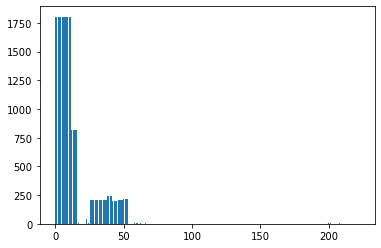

In [47]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_WB_final_X, df_WB_final_y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Feature Selection for DA

In [73]:
df_DA.merge(df_DA_log, left_on ='DPNO' , right_on= 'pcbid') # confirm problem from da_log why PCB ID is not appear

,DPNO,C_R,2DM (DA) 1. Defect,2DM (DA) 2. N_Defect,2DM (DA) 3. Row 1,2DM (DA) 4. Column 1,2DM (DA) 5. Angle 1,2DM (DA) 6. Width 1,2DM (DA) 7. Height 1,2DM (DA) 8. Row 2,2DM (DA) 9. Column 2,2DM (DA) 10. Angle 2,2DM (DA) 11. Width 2,2DM (DA) 12. Height 2,2DM (DA) 13. Center X,2DM (DA) 14. Center Y,2DM (DA) 15. Orientation,2DM (DA) 16. Row Difference,2DM (DA) 17. Column Difference,2DM (DA) 18. Distance,2DM (DA) 19. Angle Difference,2DM (DA) 20. Inspection Time,Die Crack (DA) 1. Defect,Die Crack (DA) 2. N_Defect,Die Crack (DA) 3. Total Area,Die Crack (DA) 4. Areas (min),Die Crack (DA) 4. Areas (max),Die Crack (DA) 4. Areas (avg),Die Crack (DA) 5. Total Area (um),Die Crack (DA) 6. Areas (um) (min),Die Crack (DA) 6. Areas (um) (max),Die Crack (DA) 6. Areas (um) (avg),Die Crack (DA) 7. Angle (deg) (min),Die Crack (DA) 7. Angle (deg) (max),Die Crack (DA) 7. Angle (deg) (avg),Die Crack (DA) 8. inner_radius (um) (min),Die Crack (DA) 8. inner_radius (um) (max),Die Crack (DA) 8. inner_radius (um) (avg),Die Crack (DA) 9. Offset X,Die Crack (DA) 10. Offset Y,Die Crack (DA) 11. Offset Theta,Die Crack (DA) 12. Inspection Time,Pattern Matching Modified (DA) 1. Matching Number_x,Pattern Matching Modified (DA) 2. Rows_x,Pattern Matching Modified (DA) 3. Columns_x,Pattern Matching Modified (DA) 4. Angles_x,Pattern Matching Modified (DA) 5. Scores_x,Pattern Matching Modified (DA) 6. Inspection Time_x,Pattern Matching Modified (DA) 1. Matching Number_y,Pattern Matching Modified (DA) 2. Rows_y,Pattern Matching Modified (DA) 3. Columns_y,Pattern Matching Modified (DA) 4. Angles_y,Pattern Matching Modified (DA) 5. Scores_y,Pattern Matching Modified (DA) 6. Inspection Time_y,Missing Die (DA) 1. Defect,Missing Die (DA) 2. N_Defect,Missing Die (DA) 3. Total Area,Missing Die (DA) 4. Areas,Missing Die (DA) 4. Areas (min),Missing Die (DA) 4. Areas (max),Missing Die (DA) 4. Areas (avg),Missing Die (DA) 5. Total Area (um),Missing Die (DA) 6. Areas (um),Missing Die (DA) 6. Areas (um) (min),Missing Die (DA) 6. Areas (um) (max),Missing Die (DA) 6. Areas (um) (avg),Missing Die (DA) 7. Angle (deg),Missing Die (DA) 7. Angle (deg) (min),Missing Die (DA) 7. Angle (deg) (max),Missing Die (DA) 7. Angle (deg) (avg),Missing Die (DA) 8. Offset X,Missing Die (DA) 9. Offset Y,Missing Die (DA) 10. Offset Theta,Missing Die (DA) 11. Inspection Time,Pattern Align (DA) 1. Matching Number,Pattern Align (DA) 2. Rows,Pattern Align (DA) 3. Columns,Pattern Align (DA) 4. Angles,Pattern Align (DA) 5. Scores,Pattern Align (DA) 6. Inspection Time,P/A (DA) 1. Defect,P/A (DA) 2. N_Defect,P/A (DA) 3. Row (min),P/A (DA) 3. Row (max),P/A (DA) 3. Row (avg),P/A (DA) 4. Column (min),P/A (DA) 4. Column (max),P/A (DA) 4. Column (avg),P/A (DA) 5. area(um) (min),P/A (DA) 5. area(um) (max),P/A (DA) 5. area(um) (avg),P/A (DA) 6. Copper_rect2_len2(um) (min),P/A (DA) 6. Copper_rect2_len2(um) (max),P/A (DA) 6. Copper_rect2_len2(um) (avg),P/A (DA) 7. Inspection Time,Glue (DA) 3. YWidthTop,Glue (DA) 4. YWidthBottom,Glue (DA) 5. XWidthLeft,Glue (DA) 6. XWidthRight,Glue (DA) 7. Inspection Time,Bin@Map,Time,PCBA Col,PCBA Row,Wafer Col,Wafer Row,Bin,Wafmap Filename,Wafer_CR,Unnamed: 0,pcbid,pcbid_datetime,MachineID,MoveBondZonetoPurgePosition,setdispenseleveloffsetum,setdispensetaildelayms,setdispensetailtimems,setpredispensecnt,setpredispenseleveloffsetum,epoxywholearea_lower,epoxywholearea_upper,squeezetimems_1,squeezetimems_2,squeezetimems_3,MovetoPurge,EpoxySelectOperation,DispenseLevelMoveDispensertoDispensePosition,DispenseLevelConfirm,DispenseLevelUpdatePreDispenseLevelwithZOffset,DispenserPreDispenseLevelMoveDispensertoDispensePosition,DispenserPreDispenseLevelSearchLevel,DispenserPreDispenseLevelMoveBondZonetoPreDispenseStartPosition,DispenserPreDispenseLevelConfirm,DispenserPurgePositionMoveDispensertoPreviousPurgeLevel,PositionMoveDispensertoPreviousPurgePosition,PositionMoveDispensertoPreviousPurgeLevel,LearnDispenserStandbyPositionMoveDispensertoPreviousStandbyPositionandLevel,LearnEpoxyOffsetAbor

In [76]:
# select X (DA parameter) and y (AOI result) , Target to solve DIE rotation issue    can look for alignment tools from AOI. 

In [48]:


df_DA_encaode = encode_obj_num(df_DA_final)
df_WB_encaode = encode_obj_num(df_WB_final)

In [49]:
df_WB_encaode.tail(2)

,Smash Bond (WB) 1. Defect_x,Smash Bond (WB) 2. N_Defect_x,Smash Bond (WB) 3. Total Area_x,Smash Bond (WB) 4. Areas_x,Smash Bond (WB) 4. Areas (min)_x,Smash Bond (WB) 4. Areas (max)_x,Smash Bond (WB) 4. Areas (avg)_x,Smash Bond (WB) 5. Total Area (um)_x,Smash Bond (WB) 6. Areas (um)_x,Smash Bond (WB) 6. Areas (um) (min)_x,Smash Bond (WB) 6. Areas (um) (max)_x,Smash Bond (WB) 6. Areas (um) (avg)_x,Smash Bond (WB) 7. Angle (deg)_x,Smash Bond (WB) 7. Angle (deg) (min)_x,Smash Bond (WB) 7. Angle (deg) (max)_x,Smash Bond (WB) 7. Angle (deg) (avg)_x,Smash Bond (WB) 8. circularity (min)_x,Smash Bond (WB) 8. circularity (max)_x,Smash Bond (WB) 8. circularity (avg)_x,Smash Bond (WB) 9. inner_radius (um) (min)_x,Smash Bond (WB) 9. inner_radius (um) (max)_x,Smash Bond (WB) 9. inner_radius (um) (avg)_x,Smash Bond (WB) 10. width (um) (min),Smash Bond (WB) 10. width (um) (max),Smash Bond (WB) 10. width (um) (avg),Smash Bond (WB) 11. Inspection Time,Bond Offset (WB) 1. Defect_x,Bond Offset (WB) 2. N_Defect_x,Bond Offset (WB) 3. Total Area_x,Bond Offset (WB) 4. Areas_x,Bond Offset (WB) 4. Areas (min)_x,Bond Offset (WB) 4. Areas (max)_x,Bond Offset (WB) 4. Areas (avg)_x,Bond Offset (WB) 5. Total Area (um)_x,Bond Offset (WB) 6. Areas (um)_x,Bond Offset (WB) 6. Areas (um) (min)_x,Bond Offset (WB) 6. Areas (um) (max)_x,Bond Offset (WB) 6. Areas (um) (avg)_x,Bond Offset (WB) 7. Angle (deg)_x,Bond Offset (WB) 7. Angle (deg) (min)_x,Bond Offset (WB) 7. Angle (deg) (max)_x,Bond Offset (WB) 7. Angle (deg) (avg)_x,Bond Offset (WB) 8. contlength,Bond Offset (WB) 8. contlength (min),Bond Offset (WB) 8. contlength (max),Bond Offset (WB) 8. contlength (avg),Bond Offset (WB) 9. inner_radius (um),Bond Offset (WB) 9. inner_radius (um) (min),Bond Offset (WB) 9. inner_radius (um) (max),Bond Offset (WB) 9. inner_radius (um) (avg),Bond Offset (WB) 10. bulkiness,Bond Offset (WB) 10. bulkiness (min),Bond Offset (WB) 10. bulkiness (max),Bond Offset (WB) 10. bulkiness (avg),Bond Offset (WB) 11. Inspection Time,FO2 (WB) 1. Defect,FO2 (WB) 2. N_Defect,FO2 (WB) 3. I_Defect,FO2 (WB) 5. area pad (min),FO2 (WB) 5. area pad (max),FO2 (WB) 5. area pad (avg),FO2 (WB) 6. circularity pad (min),FO2 (WB) 6. circularity pad (max),FO2 (WB) 6. circularity pad (avg),FO2 (WB) 7. area lead (min),FO2 (WB) 7. area lead (max),FO2 (WB) 7. area lead (avg),FO2 (WB) 8. area wire (min),FO2 (WB) 8. area wire (max),FO2 (WB) 8. area wire (avg),FO2 (WB) 9. height wire (min),FO2 (WB) 9. height wire (max),FO2 (WB) 9. height wire (avg),FO2 (WB) 10. width wire-const (min),FO2 (WB) 10. width wire-const (max),FO2 (WB) 10. width wire-const (avg),FO2 (WB) 11. width wire (min),FO2 (WB) 11. width wire (max),FO2 (WB) 11. width wire (avg),FO2 (WB) 12. area bond tail,FO2 (WB) 12. area bond tail (min),FO2 (WB) 12. area bond tail (max),FO2 (WB) 12. area bond tail (avg),FO2 (WB) 13. outer_radius bond tail,FO2 (WB) 13. outer_radius bond tail (min),FO2 (WB) 13. outer_radius bond tail (max),FO2 (WB) 13. outer_radius bond tail (avg),FO2 (WB) 14. Inspection Time,Unbonded (WB) 1. Defect,Unbonded (WB) 2. N_Defect,Unbonded (WB) 3. Defect Index,Unbonded (WB) 4. Inspection Time,Missing (WB) 1. Defect,Missing (WB) 2. N_Defect,Missing (WB) 3. Defect Index,Missing (WB) 4. Inspection Time,Broken (WB) 1. Defect,Broken (WB) 2. N_Defect,Broken (WB) 4. Inspection Time,Bond Tail (WB) 1. Defect,Bond Tail (WB) 2. N_Defect,Bond Tail (WB) 3. Defect Index,Bond Tail (WB) 5. Area Bond Tail,Bond Tail (WB) 5. Area Bond Tail (min),Bond Tail (WB) 5. Area Bond Tail (max),Bond Tail (WB) 5. Area Bond Tail (avg),Bond Tail (WB) 6. Row Bond Tail,Bond Tail (WB) 6. Row Bond Tail (min),Bond Tail (WB) 6. Row Bond Tail (max),Bond Tail (WB) 6. Row Bond Tail (avg),Bond Tail (WB) 7. Column Bond Tail,Bond Tail (WB) 7. Column Bond Tail (min),Bond Tail (WB) 7. Column Bond Tail (max),Bond Tail (WB) 7. Column Bond Tail (avg),Bond Tail (WB) 7. Inspection Time,NSOP (WB) 1. Defect,NSOP (WB) 2. N_Defect,NSOP (WB) 4. Inspection Time,Wire Sweep (WB) 1. Defect,Wire Sw

In [50]:
df_DA_encaode.tail(3)

,2DM (DA) 1. Defect,2DM (DA) 2. N_Defect,2DM (DA) 3. Row 1,2DM (DA) 4. Column 1,2DM (DA) 5. Angle 1,2DM (DA) 6. Width 1,2DM (DA) 7. Height 1,2DM (DA) 8. Row 2,2DM (DA) 9. Column 2,2DM (DA) 10. Angle 2,2DM (DA) 11. Width 2,2DM (DA) 12. Height 2,2DM (DA) 13. Center X,2DM (DA) 14. Center Y,2DM (DA) 15. Orientation,2DM (DA) 16. Row Difference,2DM (DA) 17. Column Difference,2DM (DA) 18. Distance,2DM (DA) 19. Angle Difference,2DM (DA) 20. Inspection Time,Die Crack (DA) 1. Defect,Die Crack (DA) 2. N_Defect,Die Crack (DA) 3. Total Area,Die Crack (DA) 4. Areas (min),Die Crack (DA) 4. Areas (max),Die Crack (DA) 4. Areas (avg),Die Crack (DA) 5. Total Area (um),Die Crack (DA) 6. Areas (um) (min),Die Crack (DA) 6. Areas (um) (max),Die Crack (DA) 6. Areas (um) (avg),Die Crack (DA) 7. Angle (deg) (min),Die Crack (DA) 7. Angle (deg) (max),Die Crack (DA) 7. Angle (deg) (avg),Die Crack (DA) 8. inner_radius (um) (min),Die Crack (DA) 8. inner_radius (um) (max),Die Crack (DA) 8. inner_radius (um) (avg),Die Crack (DA) 9. Offset X,Die Crack (DA) 10. Offset Y,Die Crack (DA) 11. Offset Theta,Die Crack (DA) 12. Inspection Time,Pattern Matching Modified (DA) 1. Matching Number_x,Pattern Matching Modified (DA) 2. Rows_x,Pattern Matching Modified (DA) 3. Columns_x,Pattern Matching Modified (DA) 4. Angles_x,Pattern Matching Modified (DA) 5. Scores_x,Pattern Matching Modified (DA) 6. Inspection Time_x,Pattern Matching Modified (DA) 1. Matching Number_y,Pattern Matching Modified (DA) 2. Rows_y,Pattern Matching Modified (DA) 3. Columns_y,Pattern Matching Modified (DA) 4. Angles_y,Pattern Matching Modified (DA) 5. Scores_y,Pattern Matching Modified (DA) 6. Inspection Time_y,Missing Die (DA) 1. Defect,Missing Die (DA) 2. N_Defect,Missing Die (DA) 3. Total Area,Missing Die (DA) 4. Areas,Missing Die (DA) 4. Areas (min),Missing Die (DA) 4. Areas (max),Missing Die (DA) 4. Areas (avg),Missing Die (DA) 5. Total Area (um),Missing Die (DA) 6. Areas (um),Missing Die (DA) 6. Areas (um) (min),Missing Die (DA) 6. Areas (um) (max),Missing Die (DA) 6. Areas (um) (avg),Missing Die (DA) 7. Angle (deg),Missing Die (DA) 7. Angle (deg) (min),Missing Die (DA) 7. Angle (deg) (max),Missing Die (DA) 7. Angle (deg) (avg),Missing Die (DA) 8. Offset X,Missing Die (DA) 9. Offset Y,Missing Die (DA) 10. Offset Theta,Missing Die (DA) 11. Inspection Time,Pattern Align (DA) 1. Matching Number,Pattern Align (DA) 2. Rows,Pattern Align (DA) 3. Columns,Pattern Align (DA) 4. Angles,Pattern Align (DA) 5. Scores,Pattern Align (DA) 6. Inspection Time,P/A (DA) 1. Defect,P/A (DA) 2. N_Defect,P/A (DA) 3. Row (min),P/A (DA) 3. Row (max),P/A (DA) 3. Row (avg),P/A (DA) 4. Column (min),P/A (DA) 4. Column (max),P/A (DA) 4. Column (avg),P/A (DA) 5. area(um) (min),P/A (DA) 5. area(um) (max),P/A (DA) 5. area(um) (avg),P/A (DA) 6. Copper_rect2_len2(um) (min),P/A (DA) 6. Copper_rect2_len2(um) (max),P/A (DA) 6. Copper_rect2_len2(um) (avg),P/A (DA) 7. Inspection Time,Glue (DA) 3. YWidthTop,Glue (DA) 4. YWidthBottom,Glue (DA) 5. XWidthLeft,Glue (DA) 6. XWidthRight,Glue (DA) 7. Inspection Time,Bin@Map,PCBA Col,PCBA Row,Wafer Col,Wafer Row,QTYIN DIE ATTACH ASIC,QTYIN DIE ATTACH CURE,QTYOUT DIE ATTACH ASIC,QTYOUT DIE ATTACH CURE,QTYREJ DIE ATTACH ASIC,QTYREJ DIE ATTACH CURE,MoveInDateTime DIE ATTACH ASIC,MoveInDateTime DIE ATTACH CURE,MoveOutDateTime DIE ATTACH ASIC,MoveOutDateTime DIE ATTACH CURE,ONDATE DIE ATTACH ASIC,ONDATE DIE ATTACH CURE,OFFDATE DIE ATTACH ASIC,OFFDATE DIE ATTACH CURE,DPNO,C_R,Time,Bin,Wafmap Filename,Wafer_CR,PKGOUTGRPNM DIE ATTACH ASIC,PKGOUTGRPNM DIE ATTACH CURE,PART_CODE DIE ATTACH ASIC,PART_CODE DIE ATTACH CURE,LOTNO DIE ATTACH ASIC,LOTNO DIE ATTACH CURE,MC_NAME DIE ATTACH ASIC,MC_NAME DIE ATTACH CURE,LOC_NM DIE ATTACH ASIC,LOC_NM DIE ATTACH CURE,MoveInEmp DIE ATTACH ASIC,MoveInEmp DIE ATTACH CURE,MoveOutEmp DIE ATTACH ASIC,MoveOutEmp DIE ATTACH CURE,REASONON DIE ATTACH ASIC,REASONON DIE ATTACH CURE,REASONOFF DIE ATTACH ASIC,REASONOFF DIE ATTACH CURE,ONHOLDBY DIE ATTACH ASIC,ONHOLDBY DIE ATTA

PCA sample

https://www.youtube.com/watch?v=QdBy02ExhGI&t=5s


Normalize mathods explain

https://developers.google.com/machine-learning/data-prep/transform/normalization 


How to Choose a Feature Selection Method For Machine Learning

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/


Sample of f_regression

https://machinelearningmastery.com/feature-selection-for-regression-data/


Sample of feature select Code

https://machinelearningmastery.com/feature-selection-for-regression-data/

Sample 

https://www.datacamp.com/community/tutorials/machine-learning-python

In [51]:
df_WB_encaode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 0 to 5395
Columns: 243 entries, Smash Bond (WB) 1. Defect_x to OFFHOLDBY
dtypes: datetime64[ns](4), float64(129), int32(4), int64(85), object(21)
memory usage: 10.0+ MB


In [52]:
df_WB_encaode.

SyntaxError: invalid syntax (<ipython-input-52-347f6813f0a3>, line 1)

In [ ]:
df_WB_encaode.select_dtypes(include ='int64' )

,Smash Bond (WB) 1. Defect_x,Smash Bond (WB) 2. N_Defect_x,Smash Bond (WB) 3. Total Area_x,Smash Bond (WB) 4. Areas_x,Smash Bond (WB) 4. Areas (min)_x,Smash Bond (WB) 4. Areas (max)_x,Bond Offset (WB) 1. Defect_x,Bond Offset (WB) 2. N_Defect_x,Bond Offset (WB) 3. Total Area_x,Bond Offset (WB) 4. Areas_x,Bond Offset (WB) 4. Areas (min)_x,Bond Offset (WB) 4. Areas (max)_x,FO2 (WB) 1. Defect,FO2 (WB) 2. N_Defect,FO2 (WB) 3. I_Defect,FO2 (WB) 5. area pad (min),FO2 (WB) 5. area pad (max),FO2 (WB) 7. area lead (min),FO2 (WB) 7. area lead (max),FO2 (WB) 8. area wire (min),FO2 (WB) 8. area wire (max),FO2 (WB) 9. height wire (min),FO2 (WB) 9. height wire (max),FO2 (WB) 10. width wire-const (min),FO2 (WB) 10. width wire-const (max),FO2 (WB) 11. width wire (min),FO2 (WB) 11. width wire (max),FO2 (WB) 12. area bond tail,FO2 (WB) 12. area bond tail (min),FO2 (WB) 12. area bond tail (max),Unbonded (WB) 1. Defect,Unbonded (WB) 2. N_Defect,Unbonded (WB) 3. Defect Index,Missing (WB) 1. Defect,Missing (WB) 2. N_Defect,Missing (WB) 3. Defect Index,Broken (WB) 1. Defect,Broken (WB) 2. N_Defect,Bond Tail (WB) 1. Defect,Bond Tail (WB) 2. N_Defect,Bond Tail (WB) 3. Defect Index,Bond Tail (WB) 5. Area Bond Tail,Bond Tail (WB) 5. Area Bond Tail (min),Bond Tail (WB) 5. Area Bond Tail (max),NSOP (WB) 1. Defect,NSOP (WB) 2. N_Defect,Wire Sweep (WB) 1. Defect,Wire Sweep (WB) 2. N_Defect,Wire Sweep (WB) 3. Total Area,Wire Sweep (WB) 4. Areas,Wire Sweep (WB) 4. Areas (min),Wire Sweep (WB) 4. Areas (max),Wire Sweep (WB) 5. Total Area (um),Wire Sweep (WB) 6. Areas (um),Wire Sweep (WB) 6. Areas (um) (min),Wire Sweep (WB) 6. Areas (um) (max),Wire Sweep (WB) 7. Angle (deg),Wire Sweep (WB) 7. Angle (deg) (min),Wire Sweep (WB) 7. Angle (deg) (max),Double Bond (WB) 1. Defect,Double Bond (WB) 2. N_Defect,Smash Bond (WB) 1. Defect_y,Smash Bond (WB) 2. N_Defect_y,Smash Bond (WB) 3. Total Area_y,Smash Bond (WB) 4. Areas_y,Smash Bond (WB) 4. Areas (min)_y,Smash Bond (WB) 4. Areas (max)_y,Smash Bond (WB) 5. Total Area (um)_y,Smash Bond (WB) 6. Areas (um)_y,Smash Bond (WB) 6. Areas (um) (min)_y,Smash Bond (WB) 6. Areas (um) (max)_y,Smash Bond (WB) 7. Angle (deg)_y,Smash Bond (WB) 7. Angle (deg) (min)_y,Smash Bond (WB) 7. Angle (deg) (max)_y,Bond Offset (WB) 1. Defect_y,Bond Offset (WB) 2. N_Defect_y,Bond Offset (WB) 3. Total Area_y,Bond Offset (WB) 4. Areas (min)_y,Bond Offset (WB) 4. Areas (max)_y,NSOL (WB) 1. Defect,NSOL (WB) 2. N_Defect,NSOL (WB) 3. Total Area,NSOL (WB) 4. Areas (min),NSOL (WB) 4. Areas (max),Bin@Map
0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1491,1586,213,249,2737,4082,118,122,42,131,42,131,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,19,4408,20,317,1,9,10621,1143,1210,1
1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1468,1569,185,215,3192,4331,120,122,61,131,61,131,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,17,5031,20,364,1,9,10349,1120,1192,77
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1547,1649,170,199,4027,4468,119,122,131,131,131,131,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,17,4677,28,368,1,9,10213,1110,1195,1
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1558,1623,149,173,3679,4700,118,123,93,131,93,131,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,16,4600,218,336,1,9,10537,1135,1216,1
4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1534,1631,137,171,2896,3314,119,123,42,62,42,62,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,17,4680,20,367,1,9,10267,1105,1180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5391,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1624,1713,208,252,3712,4

In [ ]:
df_WB_encaode_nor = df_WB_encaode.select_dtypes(include =['float64','int32','int64','object'] )

# Preprocess Data
## divide X (Feature)and Y( Responce ) >> label encoder both X and Y  >> Split test and train (for X and Y ) >> Normalize X(feature) >> feature selection

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Remove time from data

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df_WB_encaode_nor)
print(scaled)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
# get DA parameter data, only for DA defect 

In [ ]:
# transecion data, for WB, FM_die and FM_pcb

In [ ]:
# analysis with different analysis library, to know most correlate parameter
# normalize data 
# example of a normalization(sample)
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)



# discover splt train and test data

# Import `train_test_split`
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.cross_validation import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 10)


In [ ]:
# save as .csv

In [ ]:
#DONE!!!!!!!!, let create view in power BI

In [ ]:
df_pcb_grab_2.boxplot(column = 'area_mean', by = 'diagnosis');
plt.title('')

KeyError: 'diagnosis'

NameError: name 'DPNO' is not defined

In [ ]:
df_die_grab_2 = pd.DataFrame ()

for k in die_grab_2:
    
    df_2 = pd.read_csv (k, sep = ';', header = [0,1])
    df_2.columns = df_2.columns.to_flat_index().str.join(' ')
    df2 = df_die_grab_2.append(df_2)


#Rename Column
df2.rename(columns={'Unnamed: 0_level_0 Lot ID':'DPNO'},inplace=True)
df2.rename(columns={'Unnamed: 1_level_0 Unit':'Unit'},inplace=True)


#Add New Columns
df2['Col']=df2['Unit'].str.extract('_(\d+)')
df2['Row']=df2['Unit'].str.extract('\d_(\d+)')
df2['C_R']=df2['Col'] + '_' + df2['Row']
pd.set_option('max_columns', 8)

#Rearrange Row and Col
cols = list (df2.columns.values)
df2 = df2[cols [0:2] + [cols [-1]]+ [cols [-3]]+[cols [-2]]+ cols [2:-3]]

df2.head()

#df2.to_excel ('sample2.xlsx', index = False)

,DPNO,Unit,C_R,Col,...,FM On Lead 9. Offset X,FM On Lead 10. Offset Y,FM On Lead 11. Offset Theta,FM On Lead 12. Inspection Time
0,HRH14520030,HE_1_2_C,1_2,1,...,0,0,0,1.3477
1,HRH14520030,HE_2_2_C,2_2,2,...,0,0,0,1.0490
2,HRH14520030,HE_2_1_C,2_1,2,...,0,0,0,1.2068
3,HRH14520030,HE_1_1_C,1_1,1,...,0,0,0,1.4852
4,HRH14520030,HE_4_2_C,4_2,4,...,0,0,0,3.2071


In [ ]:

##Extract Carrier ID from path 
for j in all_txt_file:                                      #all_txt_file carry all path in list 
    DPNO = re.findall (r'HRH\d+', j)
    Data = pd.read_csv (j, delimiter = ';', header = [0,1])
    Data ['DPNO'] = DPNO[0]
    
        
        
   #print (Data)
    
    df=Data 
    #Rearrange Col for DPNO
    cols = list (df.columns.values)
    df = df [[cols [-1]] + cols [0:-1]]
    
    #Merge 2 columns as header
    df.columns =df.columns.to_flat_index().str.join(' ')
    pd.set_option('max_columns', None)


    #Rename Column
    df.rename(columns={'Unnamed: 0_level_0 Unit':'Unit'},inplace=True)
    df['Col']=df['Unit'].str.extract('_(\d+)')
    df['Row']=df['Unit'].str.extract('\d_(\d+)')
    df['C_R']=df['Col']+'_'+df['Row']

    #Rearrange Row and Col
    cols = list (df.columns.values)
    df = df[cols [0:2] + [cols [-1]]+ [cols [-3]]+[cols [-2]]+ cols [2:-3]]

    
    if j is all_txt_file[0]:
        df_0 = df
    df_merge = pd.merge(df_0 ,df,on= 'C_R', how = 'outer')
    df_merge

#df["Order_Date"]=df['Shipment ID'].replace(regex=r"\-.",value="")
#df.to_csv ('Data.csv', index = False)
    
    
   #print('df_0.shape= ',df_0.shape)
   #print('df.shape=',df.shape)
    #df3 = pd.concat([df,df2])
    #All_Data = pd.merge (df, df2, left_on = 'Unit', right_on = 'Unit')
#df_merge

NameError: name 'all_txt_file' is not defined

In [ ]:
#pd.merge(df_0 ,df,on= ['DPNO','C_R'])

In [ ]:
#Merge 2 columns as header
df.columns =df.columns.to_flat_index().str.join(' ')
pd.set_option('max_columns', None)


#Rename Column
df.rename(columns={'Unnamed: 0_level_0 Unit':'Unit'},inplace=True)
df['Col']=df['Unit'].str.extract('_(.)')
df['Row']=df['Unit'].str.extract('\d_(.)')

#Rearrange Row and Col
cols = list (df.columns.values)
df = df [cols [0:2] + [cols [-2]] + [cols [-1]] + cols [2:-2]]



#df["Order_Date"]=df['Shipment ID'].replace(regex=r"\-.",value="")
#df.to_csv ('Data.csv', index = False)
df.head(4)

In [ ]:
df2 = pd.DataFrame()  

import pandas as pd
from functools import reduce

for n in all_txt_file:
    df3 = pd.concat([df,df2])
    
    
    #All_Data = pd.merge (df3, , left_on = 'Unit', right_on = 'Unit', how = 'outer', indicator = True)
    
    #df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Unit'],
                                            #how='outer'), data_frames)


    #print (data_frames)
df

In [ ]:
A = 'C:\\Users\\QiauHui_Wong\\QIAO HUI\\MMS#2 Result\\HRH14111461_20211005170600\\Fail\\Die level_Grab 1 (Fail).txt'

DPNO = re.findall (r'HRH\d+', A)

DPNO

In [ ]:
#df_2.append (full_data, ignore_index=False, verify_integrity=False, sort=None)

In [ ]:
header_name='Bond Offset 7. Angle (deg)'

# Notice that all individual items are of type string including '[12,13.5]'
list_from_column = df[header_name].tolist()

li_flat = []

for m in range(len(list_from_column)):
    # find character '[' to find individual items that are not a single string number
    if '[' in list_from_column[m]:
        # remove character '[' and ']' and split the numbers of 12 and 13.5.
        # 'inner' variable looks like this ['12', '13.5']
        inner = list_from_column[m].replace(
            "[", "").replace("]", "").split(",")
        # convert 'inner' variable that has list of strings to list of floats
        # 'inner_float' variable looks like this [12.0, 13.5]
        inner_float = list(np.float_(inner))
        # Find the mean of the list of float numbers
        inner_mean = np.mean(inner_float)
        # Append the mean number into li_flat 
        li_flat.append(inner_mean)

    else:
        # if values are a single string '5', then straight convert that string to float type
        # from '5' to 5.0
        singleNum_float = np.float_(list_from_column[m])
        # Straight away append the single float number into li_flat
        li_flat.append(singleNum_float)


# This is printing in string interpolation FYI ya
#print(f'list_from_column is \n{list_from_column}\n')
#print(f'The mean values of each cell are \n{li_flat}\n')

#df ['Bond Offset Mean'] = li_flat
#df.head(5)

header_name